In [2]:
import pandas as pd
from urllib.request import urlretrieve

In [3]:
iris = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)

('/tmp/tmpwne4e2oq', <http.client.HTTPMessage at 0x7aedc7d316a0>)

In [4]:
df = pd.read_csv(iris,sep=',',header=None)

In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "species"
]
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
125,7.2,3.2,6.0,1.8,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica
89,5.5,2.5,4.0,1.3,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
stats = df.groupby("species")["petal_length"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std"
)

stats

,mean,median,variance,std_dev
species,,,,
Iris-setosa,1.464,1.50,0.030106,0.173511
Iris-versicolor,4.260,4.35,0.220816,0.469911
Iris-virginica,5.552,5.55,0.304588,0.551895


The median tells a different story than the mean when the data distribution is skewed or contains outliers. In such cases, extreme values pull the mean toward one side, while the median remains relatively stable and represents the central value of the data more accurately. In the petal length data, small differences between the mean and median for Iris-versicolor and Iris-virginica indicate slight skewness in their distributions, whereas the close values for Iris-setosa suggest a more symmetric distribution. Therefore, when the data is not perfectly symmetric, the median provides a better representation of the typical value than the mean.

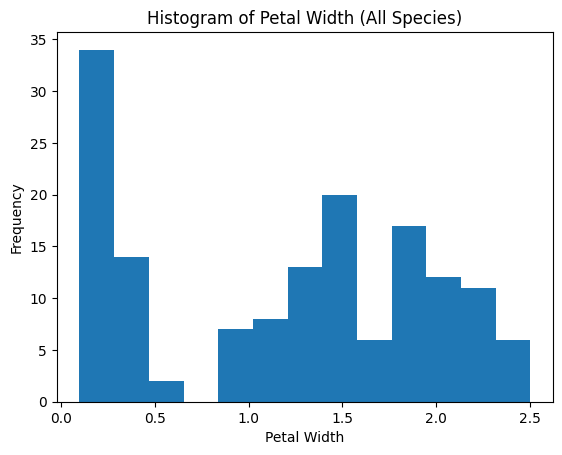

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["petal_width"], bins=13)
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Width (All Species)")
plt.show()


<Figure size 640x480 with 0 Axes>

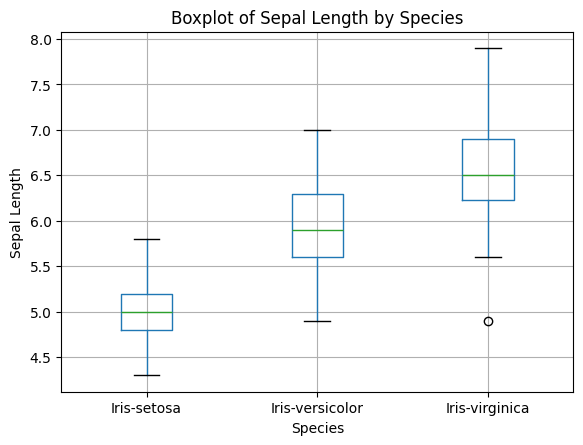

In [14]:
plt.figure()

df.boxplot(column="sepal_length", by="species")

plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.title("Boxplot of Sepal Length by Species")
plt.suptitle("")
plt.show()


The boxplot of sepal length by species better shows between-species differences because it separates the data for each species and clearly displays their medians, spread (IQR), and outliers. This makes it easy to compare how sepal length varies across Iris-setosa, Iris-versicolor, and Iris-virginica. In contrast, the histogram of petal width combines all species into a single distribution, which hides individual species differences and makes direct comparison difficult. Therefore, the boxplot is more effective for identifying and comparing differences between species.

In [15]:
skewness = df.groupby("species")["petal_length"].skew()
skewness


,petal_length
species,
Iris-setosa,0.071846
Iris-versicolor,-0.606508
Iris-virginica,0.549445


In [16]:
most_positive = skewness.idxmax()
most_negative = skewness.idxmin()

most_positive, most_negative


('Iris-virginica', 'Iris-versicolor')

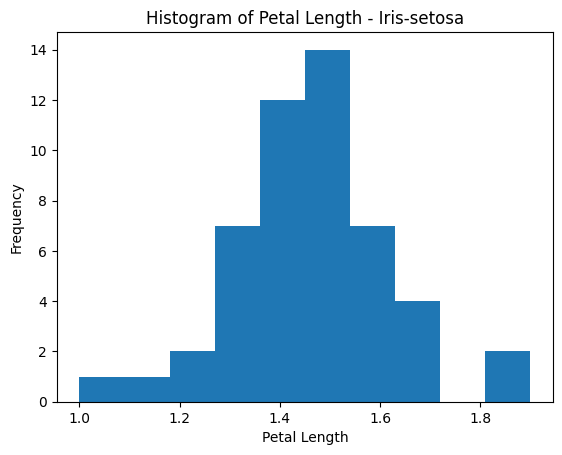

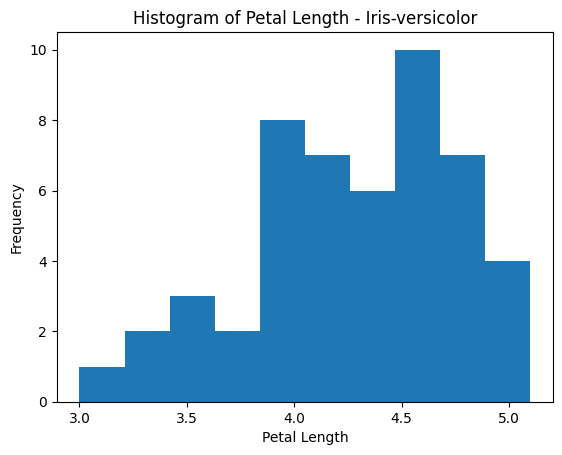

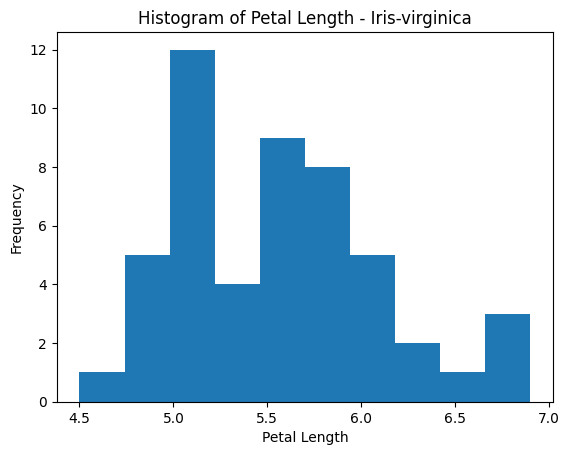

In [17]:
import matplotlib.pyplot as plt

species_list = df["species"].unique()

for sp in species_list:
    plt.figure()
    plt.hist(df[df["species"] == sp]["petal_length"], bins=10)
    plt.xlabel("Petal Length")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Petal Length - {sp}")
    plt.show()


Right tail longer → Positive skew

Left tail longer → Negative skew

Balanced shape → Near symmetric

 <!-- The skewness results and histograms show that **Iris-virginica** has the **most positively skewed** petal length distribution, with a longer right tail caused by a few larger petal lengths. **Iris-versicolor** is the **most negatively skewed**, as its distribution shows a slightly longer left tail with more values below the central range. **Iris-setosa** appears close to symmetric, with most values concentrated around the center and minimal skewness. -->


The skewness results and histograms show that Iris-virginica has the most positively skewed petal length distribution, with a longer right tail caused by a few larger petal lengths. Iris-versicolor is the most negatively skewed, as its distribution shows a slightly longer left tail with more values below the central range. Iris-setosa appears close to symmetric, with most values concentrated around the center and minimal skewness.

In [18]:
import numpy as np

r = np.corrcoef(df["sepal_length"], df["petal_length"])[0, 1]
r
if r > 0:
    relation = "Positive"
elif r < 0:
    relation = "Negative"
else:
    relation = "No relationship"

relation


'Positive'

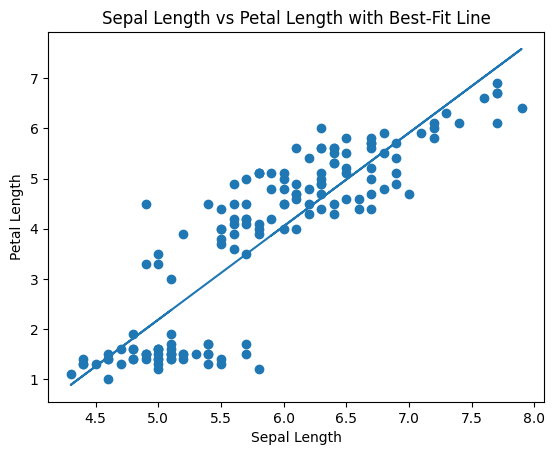

In [19]:

x = df["sepal_length"]
y = df["petal_length"]

# Best-fit line
m, b = np.polyfit(x, y, 1)

plt.figure()
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal Length vs Petal Length with Best-Fit Line")
plt.show()


In [20]:
sepal_length = df["sepal_length"]

sample_means = []

for i in range(100):
    sample = sepal_length.sample(n=20, replace=True)
    sample_means.append(sample.mean())

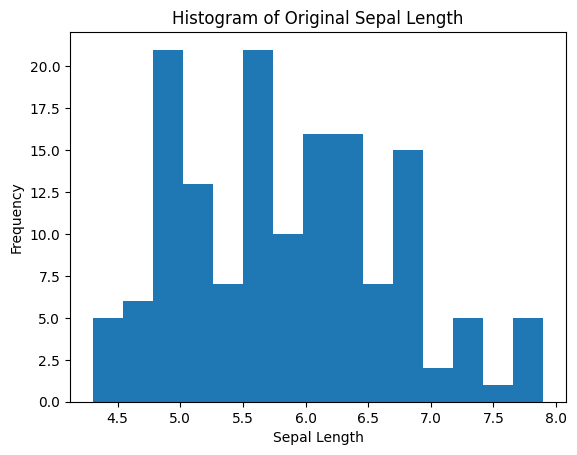

In [21]:
plt.figure()
plt.hist(sepal_length, bins=15)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Original Sepal Length")
plt.show()


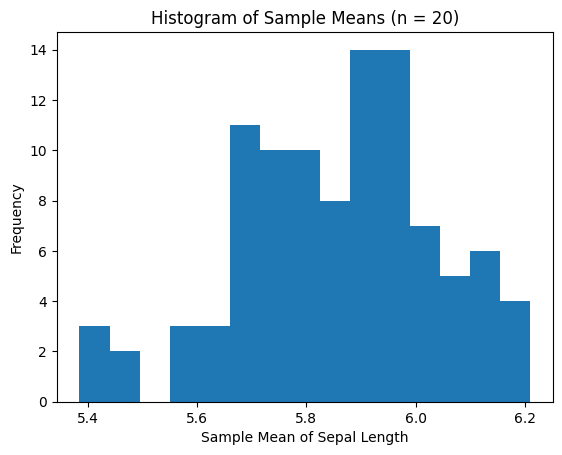

In [22]:
plt.figure()
plt.hist(sample_means, bins=15)
plt.xlabel("Sample Mean of Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Means (n = 20)")
plt.show()


The original sepal length distribution is more spread out and slightly skewed, while the distribution of the sample means is narrower and approximately normal. This shows that averaging reduces variability and illustrates the Central Limit Theorem, where sample means tend to follow a normal distribution.

In [23]:
#pearson correlation"
r = np.corrcoef(df["sepal_length"], df["petal_length"])[0, 1]
r
if r > 0:
    relation = "Positive"
elif r < 0:
    relation = "Negative"
else:
    relation = "No relationship"

relation

'Positive'

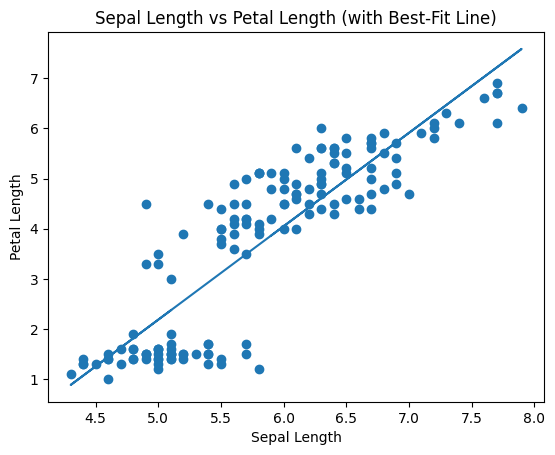

In [24]:
x = df["sepal_length"]
y = df["petal_length"]

# Compute best-fit line
m, b = np.polyfit(x, y, 1)

plt.figure()
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal Length vs Petal Length (with Best-Fit Line)")
plt.show()

In [25]:
setosa = df[df["species"] == "Iris-setosa"]["petal_length"]
versicolor = df[df["species"] == "Iris-versicolor"]["petal_length"]


In [26]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(setosa, versicolor, equal_var=False)

t_stat, p_value


(np.float64(-39.46866259397271), np.float64(1.057210030060334e-45))

In [27]:
if p_value < 0.05:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

decision


'Reject the null hypothesis'

Since the p-value is far less than 0.05, we reject the null hypothesis and conclude that Setosa and Versicolor do not have the same mean petal length.

In [28]:
setosa = df[df["species"] == "Iris-setosa"]["petal_width"]
versicolor = df[df["species"] == "Iris-versicolor"]["petal_width"]
virginica = df[df["species"] == "Iris-virginica"]["petal_width"]


In [29]:
from scipy.stats import f_oneway

F_stat, p_value = f_oneway(setosa, versicolor, virginica)

F_stat, p_value


(np.float64(959.3244057257591), np.float64(4.376956957489586e-85))

In [31]:
if p_value < 0.05:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

decision

'Reject the null hypothesis'

Since the p-value is far less than 0.05, we reject the null hypothesis and conclude that petal width differs significantly across Setosa, Versicolor, and Virginica.